# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stanley
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | alofi
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | chonchi
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | rosso
Processing Record 13 of Set 1 | plastun
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | salekhard
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | qamdo
Processing Record 21 of Set 1 | carrigaline
Processing Record 22 

Processing Record 40 of Set 4 | shingu
Processing Record 41 of Set 4 | pasuquin
Processing Record 42 of Set 4 | chinchilla
Processing Record 43 of Set 4 | ambovombe
Processing Record 44 of Set 4 | jayapura
Processing Record 45 of Set 4 | kerikeri
Processing Record 46 of Set 4 | vamospercs
Processing Record 47 of Set 4 | anadyr
Processing Record 48 of Set 4 | port lincoln
Processing Record 49 of Set 4 | lerwick
Processing Record 0 of Set 5 | maksatikha
Processing Record 1 of Set 5 | zhanaozen
Processing Record 2 of Set 5 | remire-montjoly
Processing Record 3 of Set 5 | daru
Processing Record 4 of Set 5 | nemuro
Processing Record 5 of Set 5 | dellys
Processing Record 6 of Set 5 | umm kaddadah
Processing Record 7 of Set 5 | aksu
Processing Record 8 of Set 5 | ketchikan
Processing Record 9 of Set 5 | tejen
Processing Record 10 of Set 5 | bandon
Processing Record 11 of Set 5 | thoen
Processing Record 12 of Set 5 | hammerfest
Processing Record 13 of Set 5 | roma
Processing Record 14 of Set 5

Processing Record 31 of Set 8 | bridgetown
Processing Record 32 of Set 8 | salalah
Processing Record 33 of Set 8 | la punta
Processing Record 34 of Set 8 | hanting
Processing Record 35 of Set 8 | fisterra
Processing Record 36 of Set 8 | lake park
Processing Record 37 of Set 8 | tirana
Processing Record 38 of Set 8 | vernon
Processing Record 39 of Set 8 | khark
Processing Record 40 of Set 8 | fada
Processing Record 41 of Set 8 | saipan
Processing Record 42 of Set 8 | zaozersk
Processing Record 43 of Set 8 | la'ie
Processing Record 44 of Set 8 | wajir
Processing Record 45 of Set 8 | menomonie
Processing Record 46 of Set 8 | westport
Processing Record 47 of Set 8 | inhambane
Processing Record 48 of Set 8 | gourdon
Processing Record 49 of Set 8 | glarus
Processing Record 0 of Set 9 | zavitinsk
Processing Record 1 of Set 9 | taltal
Processing Record 2 of Set 9 | nabire
Processing Record 3 of Set 9 | karasburg
Processing Record 4 of Set 9 | soroti
Processing Record 5 of Set 9 | plattsburgh
P

Processing Record 22 of Set 12 | mugia
Processing Record 23 of Set 12 | namanga
Processing Record 24 of Set 12 | port blair
Processing Record 25 of Set 12 | kudahuvadhoo
Processing Record 26 of Set 12 | blenheim
Processing Record 27 of Set 12 | kupang
Processing Record 28 of Set 12 | chiroqchi
Processing Record 29 of Set 12 | beaver falls
Processing Record 30 of Set 12 | san juan bautista
Processing Record 31 of Set 12 | newman
Processing Record 32 of Set 12 | kargil
Processing Record 33 of Set 12 | san blas
Processing Record 34 of Set 12 | nileshwar
Processing Record 35 of Set 12 | dauphin
Processing Record 36 of Set 12 | ceerigaabo
Processing Record 37 of Set 12 | guerrero negro
Processing Record 38 of Set 12 | puerto baquerizo moreno
Processing Record 39 of Set 12 | manadhoo
Processing Record 40 of Set 12 | bokovskaya
Processing Record 41 of Set 12 | okha
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
city_data

[{'City': 'stanley',
  'Lat': 54.868,
  'Lng': -1.6985,
  'Max Temp': 17.62,
  'Humidity': 92,
  'Cloudiness': 75,
  'Wind Speed': 1.54,
  'Country': 'GB',
  'Date': 1691725869},
 {'City': 'georgetown',
  'Lat': 5.4112,
  'Lng': 100.3354,
  'Max Temp': 30.97,
  'Humidity': 66,
  'Cloudiness': 20,
  'Wind Speed': 3.6,
  'Country': 'MY',
  'Date': 1691725869},
 {'City': 'alofi',
  'Lat': -19.0595,
  'Lng': -169.9187,
  'Max Temp': 27.94,
  'Humidity': 78,
  'Cloudiness': 40,
  'Wind Speed': 3.09,
  'Country': 'NU',
  'Date': 1691725869},
 {'City': 'port elizabeth',
  'Lat': -33.918,
  'Lng': 25.5701,
  'Max Temp': 20.05,
  'Humidity': 45,
  'Cloudiness': 0,
  'Wind Speed': 3.09,
  'Country': 'ZA',
  'Date': 1691725869},
 {'City': 'bredasdorp',
  'Lat': -34.5322,
  'Lng': 20.0403,
  'Max Temp': 12.1,
  'Humidity': 68,
  'Cloudiness': 0,
  'Wind Speed': 1.38,
  'Country': 'ZA',
  'Date': 1691725870},
 {'City': 'port-aux-francais',
  'Lat': -49.35,
  'Lng': 70.2167,
  'Max Temp': 3.22,
  'H

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanley,54.8680,-1.6985,17.62,92,75,1.54,GB,1691725869
1,georgetown,5.4112,100.3354,30.97,66,20,3.60,MY,1691725869
2,alofi,-19.0595,-169.9187,27.94,78,40,3.09,NU,1691725869
3,port elizabeth,-33.9180,25.5701,20.05,45,0,3.09,ZA,1691725869
4,bredasdorp,-34.5322,20.0403,12.10,68,0,1.38,ZA,1691725870


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,17.62,92,75,1.54,GB,1691725869
1,georgetown,5.4112,100.3354,30.97,66,20,3.60,MY,1691725869
2,alofi,-19.0595,-169.9187,27.94,78,40,3.09,NU,1691725869
3,port elizabeth,-33.9180,25.5701,20.05,45,0,3.09,ZA,1691725869
4,bredasdorp,-34.5322,20.0403,12.10,68,0,1.38,ZA,1691725870


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

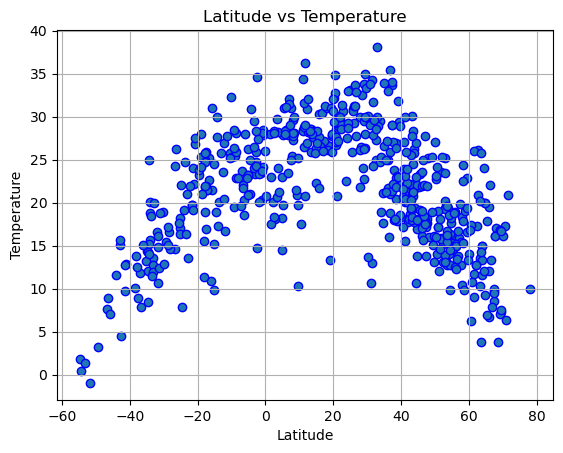

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='blue')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs Temperature')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

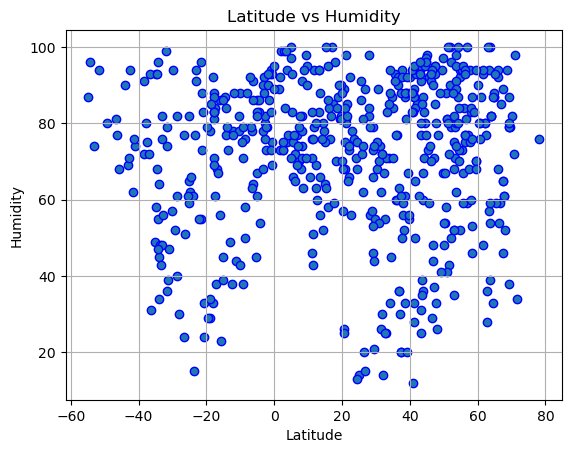

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='blue')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

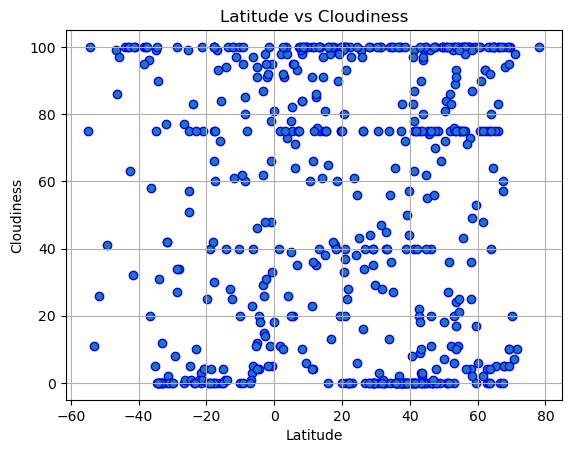

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='blue')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

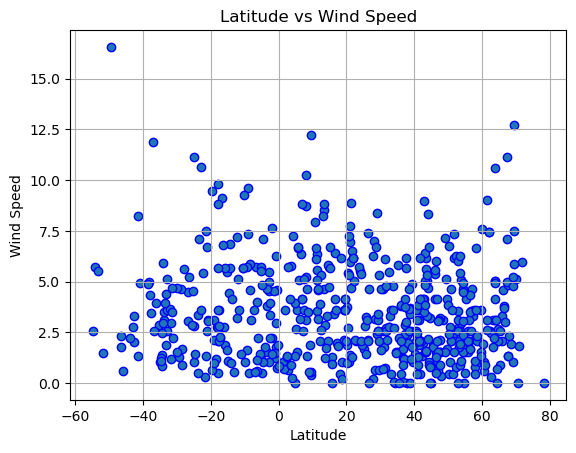

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='blue')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [77]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    
    #Plot the line
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,regress_values,"--", color='red')
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(r_value**2,2)}")

In [78]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,17.62,92,75,1.54,GB,1691725869
1,georgetown,5.4112,100.3354,30.97,66,20,3.60,MY,1691725869
7,yellowknife,62.4560,-114.3525,17.29,77,75,2.57,CA,1691725870
10,rosso,16.4986,-15.8153,26.09,76,98,6.43,SN,1691725871
11,plastun,44.7561,136.2939,17.00,96,100,3.22,RU,1691725871


In [79]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,alofi,-19.0595,-169.9187,27.94,78,40,3.09,NU,1691725869
3,port elizabeth,-33.9180,25.5701,20.05,45,0,3.09,ZA,1691725869
4,bredasdorp,-34.5322,20.0403,12.10,68,0,1.38,ZA,1691725870
5,port-aux-francais,-49.3500,70.2167,3.22,80,41,16.57,TF,1691725870
6,chonchi,-42.6128,-73.8092,4.51,94,63,2.01,CL,1691725870


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is 0.44


Text(0.5, 1.0, 'Temperature vs. Latitude')

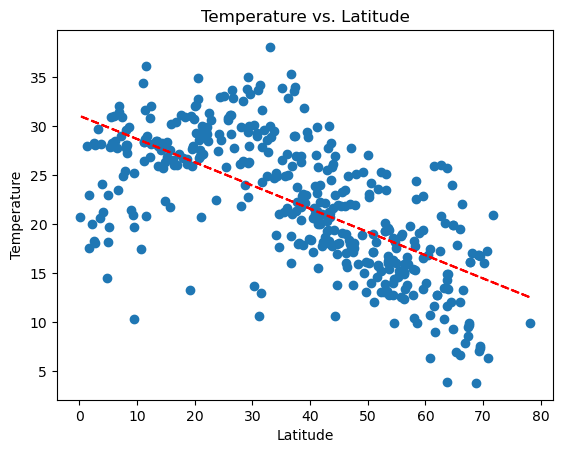

In [83]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(10, 10))
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Temperature vs. Latitude")

The r-value between Lat and Max Temp is 0.61


Text(0.5, 1.0, 'Temperature vs. Latitude')

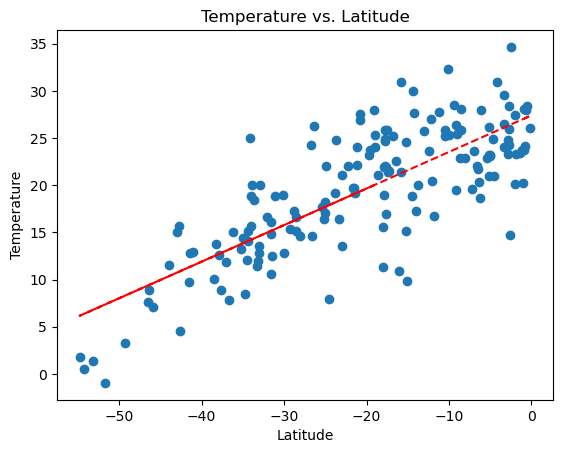

In [84]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(10, 10))
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Temperature vs. Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.0


Text(0.5, 1.0, 'Humidity vs. Latitude')

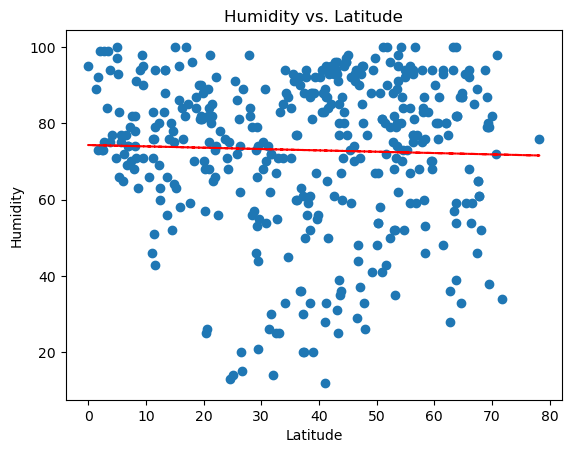

In [85]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(10, 10))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Humidity vs. Latitude")

The r-value between Lat and Humidity is 0.01


Text(0.5, 1.0, 'Humidity vs. Latitude')

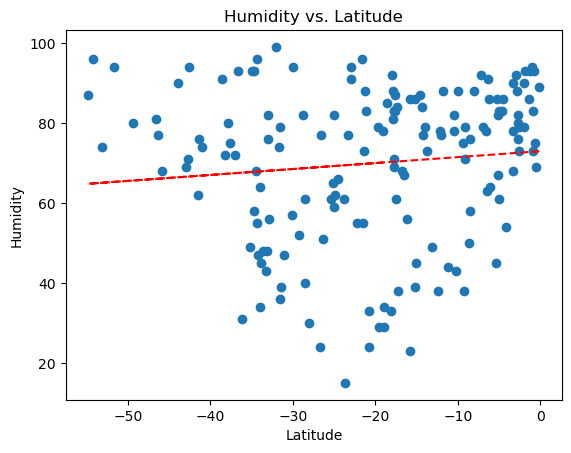

In [86]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(10, 10))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Humidity vs. Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Lat and Cloudiness is 0.0


Text(0.5, 1.0, 'Cloudiness vs. Latitude')

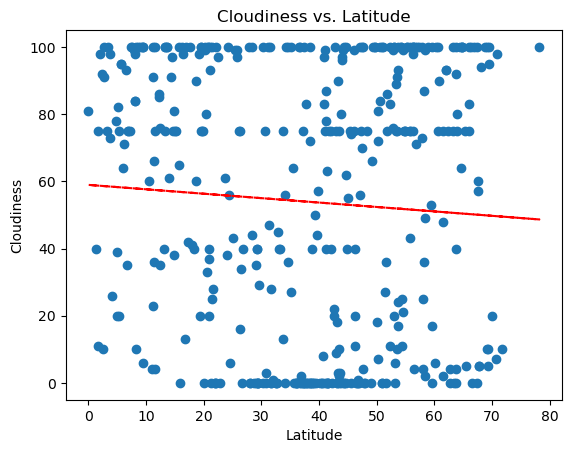

In [87]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(10, 10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Cloudiness vs. Latitude")

The r-value between Lat and Cloudiness is 0.0


Text(0.5, 1.0, 'Cloudiness vs. Latitude')

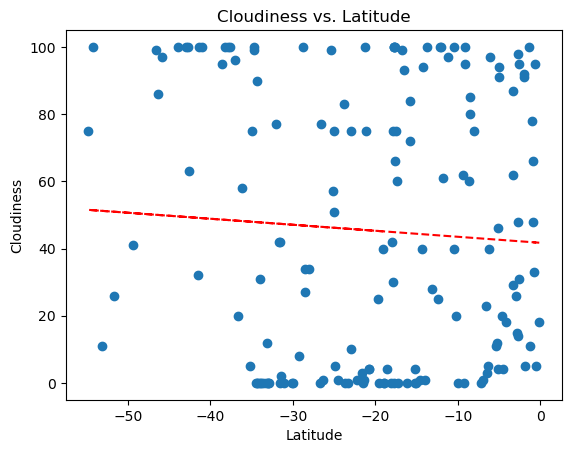

In [88]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(10, 10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Cloudiness vs. Latitude")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value between Lat and Wind Speed is 0.01


Text(0.5, 1.0, 'Wind Speed vs. Latitude')

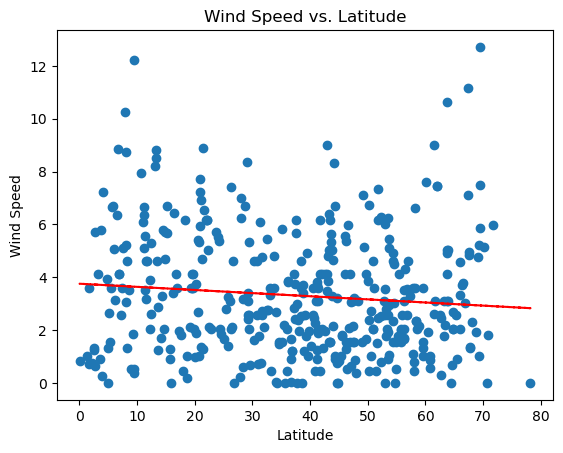

In [89]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(10, 10))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Wind Speed vs. Latitude")

The r-value between Lat and Wind Speed is 0.0


Text(0.5, 1.0, 'Wind Speed vs. Latitude')

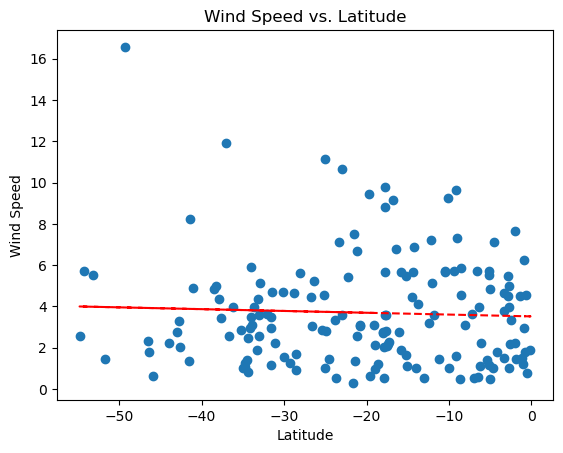

In [90]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(10, 10))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Wind Speed vs. Latitude")


**Discussion about the linear relationship:** YOUR RESPONSE HERE